# Pratical work: probability with Python (ETHZ 2023)

## 1) Simulation of laws

### 1.1) Uniform law

How does Python simulate a sequence of independent and uniform random variables on $[0,1]$?


In a nutshell, this amounts to generating uniform independent random integers in $E= \{1,2, \ldots,M\}$ and then dividing them by $M$. To do this, Python generates a series of pseudo-random numbers starting from a $x_{0} \in E$ state (the seed) and successively applying the same $f : E \rightarrow E$ function (for example $f(x)=ax+c$ modulo $M$ with well-chosen $a$ and $c$). This transformation must of course verify several properties: we want the generated sequence to “resemble” a sequence of uniform and independent random variables on $E$. What does “resemble” mean? The sequel must manage to pass an entire
battery of statistical tests of independence and adequacy of law. In particular, the period, that is to say the smallest integer $k$ such as $f^{(k)}(x)=x$ (with $f^{(k)}$ the $k$-th iteration), must be (very (very)) large.

Python uses the algorithm called `Mersenne Twister``
 (developed by Makoto Matsumoto and Takuji Nishimura in 1997) having a period of $2^{19937}-1$ (which is a Mersenne prime number).

So: are there real random number generators?

- **NO:** Not really, all generators are deterministic!!

- **BUT:** they are constructed in such a way as to pass statistical tests.

**Question 0** Run the following code several times:

In [1]:
import numpy.random as npr

print (npr.rand())
npr.seed(seed=1)
print (npr.rand())
print (npr.rand())
print (npr.rand())
npr.seed(seed=1)
print (npr.rand())
print (npr.rand())
print (npr.rand())

0.5152012179937163
0.417022004702574
0.7203244934421581
0.00011437481734488664
0.417022004702574
0.7203244934421581
0.00011437481734488664


We thus assume that we have at our disposal a "black box" which allows us to simulate a series of independent and uniform random variables on $[0,1]$.

To generate random variables with law different from the uniform law, we sometimes using
clever transformations (simulation algorithm).


_Example (simulation of a uniform variable on any segment)._ If $a<b$ and $U$ is a uniform random variable on $[0,1]$, it is a simple matter to show that $a+(b-a)U$ follows a uniform law on $[a,b]$. So, to simulate a uniform random variable on $[a,b]$, we simulate a uniform $U$ random variable on $[0,1]$ and return $a+(b-a)U$.

### 1.2) Simulation by inversion of the distribution function

**Theorem** Let $X$ be a real random variable. We assume that its distribution function $F$ is strictly increasing ($F$ is therefore bijective of $\mathbb{R}$ on $]0,1[$ and we can write $F^{-1}$ as its inverse). Let $U$ be a uniform random variable on $[0,1]$. Then $F^{-1}(U)$ has the same law as $X$.


*Let's give the proof:* Let $x \in \mathbb{R}$. We calculate $\mathbb{P}(F^{-1}(U) \leq x)=\mathbb{P}(U \leq F(x))=F(x)$ (because $U$ is uniform on $[0,1]$ and $0 \leq F(x) \leq 1$). So $F^{-1}(U)$ has the same distribution function as $X$, which concludes the proof.

*Example.* If $U$ is uniform on $[0,1]$ and $\lambda>0$, then $V= - \frac{1}{\lambda} \ln(U)$ is an exponential law with parameter $\lambda$.


**Note.** If $F$ is not strictly increasing (and therefore not injective), the previous theorem remains true provided you *define* $F^{-1}(u)$ as $F^{-1}(u)= \inf \{x \in \mathbb{R}: F(x) \geq u\}$ ($F^{-1}$ is called the inverse continuous to the right of $F$).

__Question 1.__ Simulate a Cauchy random variable with parameter $1$ whose density is $ \frac{2}{\pi} \frac{1}{1+x^{2}}$ by completing the following Code (the BLA must be replaced)

In [2]:
from math import *
import numpy.random as npr

def Cauchy():
    U=npr.rand() #sample a uniform real number on [0,1].
    return tan(pi*(U-1/2)) #Evaluate the inverse of the cdf at U
    
print (Cauchy())

-0.7154054464787064


### 1.3) Geometric law

We will compare several ways of simulating a geometric variable with parameter $p \in (0,1)$ from a uniform random variable on $[0,1]$ based on the following theoretical results:

- Generally speaking, to simulate a random variable $X$ with integer values such that $\mathbb{P}(X=i)=p_{i}$ for all $i \geq 0$, we sample a uniform variable $U$ on $[0,1]$ and we return the integer $k$ such as $p_{0}+ \cdots+p_{k-1}<U<p_{0}+ \cdots+p_{k}$.

- We sample Bernoulli random variables with parameter $p$ (we return $1$ if a uniform random variable $U$ on $[0,1]$ is smaller than $p$, $0$ otherwise) and we stop at the first time we get $1$.

- We set $\lambda= - \frac{1}{\ln(1-p)}$ and return $\lceil \lambda X \rceil$ ($\lceil x \rceil$ is the smallest integer $k$ such as $k \geq x$, `ceil` in `Python`) where $X$ is an exponential random variable with parameter $1$.

- Use a built-in `Python` function.

**Question 2.** Compare the effectiveness of these three methods for simulating $N$ geometric parameter variables with parameter $p$ by completing the following Code (replacing the BLA). Comment on the influence of the parameters.

In [3]:
from math import *
import numpy as np
import numpy.random as npr
from time import time

p=0.1 #parameter of the geometric distribution

N=10000 #number of times the geometric random variable is sampled

def methode1():
    k=1
    tmp=p
    U=npr.rand()
    while U>tmp:
        tmp=tmp+p*(1-p)**k
        k=k+1
    return k    
    
def methode2():
    tmp=0
    k=0
    while tmp==0:
        k=k+1
        if npr.rand()<p: 
            tmp=1
    return k
    
def methode3():
    X=-log(npr.rand())
    return int(ceil(-X/log(1-p)))

def methode4():
    return npr.geometric(p)
    
t1 = time()    
[methode1() for i in range(N)]
t2 = time()
temps1 = t2 - t1
print ("Method 1 took ", temps1, " seconds")

t1 = time()    
[methode2() for i in range(N)]
t2 = time()
temps1 = t2 - t1
print ("Method 2 took ", temps1, " seconds")

t1 = time()    
[methode3() for i in range(N)]
t2 = time()
temps1 = t2 - t1
print ("Method 3 took ", temps1, " seconds")

t1 = time()    
[methode4() for i in range(N)]
t2 = time()
temps1 = t2 - t1
print ("Method 4 took ", temps1, " seconds")


Method 1 took  0.023940086364746094  seconds
Method 2 took  0.0375821590423584  seconds
Method 3 took  0.007451057434082031  seconds
Method 4 took  0.008088111877441406  seconds


## 2) Convergence of random variables

### 2.1) Approximation of a Poisson distribution by a binomial distribution

We have seen (or soon will see) the following result.

**Theorem** Let $\lambda>0$. Let $X_{n}$ be a binomial random variable with parameter $(n, \lambda/n)$. Then $X_{n}$ converges in law to a Poisson distribution with parameter $\lambda$ when $n \rightarrow \infty$ (that is to say that for all $k \geq 0$, $\mathbb{P}({X_{n}=k}) \rightarrow e^{-\lambda} \lambda^{k}/k!$ when $n \rightarrow \infty$).

**Question 3.** Illustrate this theorem by completing the following Code.

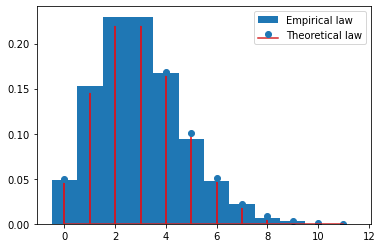

In [4]:
import numpy as np
import numpy.random as npr
import scipy.stats as sps
import matplotlib.pyplot as plt

param=3 #parameter 
n=100
N=5000 #number of samples to plot the histogram of the law of X_n

X=npr.binomial(n,param/n,N)

counts = np.bincount(X) / float(N)
x = np.arange(len(counts))
f_x = sps.poisson.pmf(x, param)
plt.close()
plt.bar(x , counts, width=1., label="Empirical law")
p2 = plt.stem(x, f_x, "r", label="Theoretical law")
plt.legend()
plt.show()

### 2.2) Approximation of an exponential law by a geometric law

We have shown (or soon will show) the following result.

**Theorem** Let $\lambda>0$. If $X_{n}$ is a random variable of geometric law with parameter $\lambda/n$, then $X_{n}$ converges in law to an exponential variable with parameter $\lambda$ when $n \rightarrow \infty$ (that is to say that for all $x \geq 0$ we have $\mathbb{P}({X_{n} \leq x}) \rightarrow \mathbb{P}({Z \leq x})$ where $Z$ is a variable exponential random with parameter $\lambda$).

**Question 4.** Illustrate this theorem by completing the following Code.

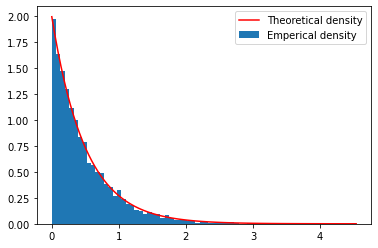

In [5]:
import numpy as np
import numpy.random as npr
import scipy.stats as sps
import matplotlib.pyplot as plt

param=2 #parameter 
n=1000
N=5000 #number of samples to plot the histogram of the distribution of X_n

X=npr.geometric(param/n,N)

plt.hist(X/n, density=True, label="Emperical density", bins=int(sqrt(N)))
x = np.linspace(min(X/n), max(X/n), 100) 
f_x =  param*np.exp(-param*x)
plt.plot(x, f_x, "r", label="Theoretical density")
plt.legend()

### 2.3) Illustration of a convergence

It is possible to demonstrate that if $(X_{n}, n \geq 2)$ is a sequence of exponential random variables with parameter $1$, defined on the same probability space, then almost surely the largest limiting value (limit along a subsequence) of the sequence $(X_{n}/\ln(n), n \geq 2)$ is equal to $1$.

**Question 5.** Illustrate this result by completing the following code.

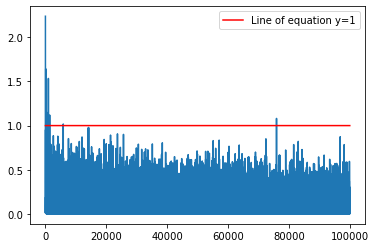

In [6]:
import numpy as np
import numpy.random as npr
import scipy.stats as sps
import matplotlib.pyplot as plt

n=100000

X=np.arange(2,n+2)
Y=npr.exponential(1,n)/np.log(X)

plt.plot(X, Y)
plt.plot(X, np.ones(n), "r", label="Line of equation y=1")

plt.legend()

**Question 6.** Study numerically the convergence in law of the sequence $X_{n}/\ln(n)$ when $n \rightarrow \infty$.

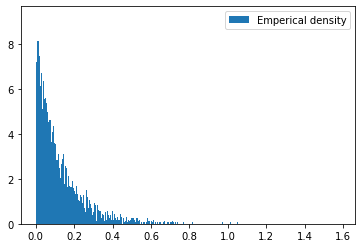

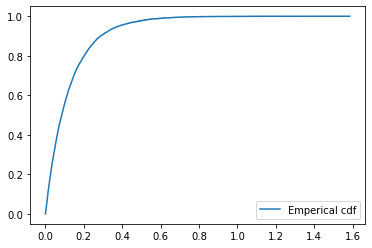

In [7]:
import numpy as np
import numpy.random as npr
import scipy.stats as sps
import matplotlib.pyplot as plt

n=10000

X=np.arange(2,n+2)
Y=npr.exponential(1,n)/np.log(X)

plt.close()
#We look if the empircal "density" convergeges
plt.hist(Y, density=True, label="Emperical density", bins=1000)
#We then look if the emperical cdf converges at every point
Y_croissant = np.sort(Y)  # We order the samples in an increasing way
plt.legend()
plt.figure()
plt.step(Y_croissant, np.arange(n)/n, label="Emperical cdf") 
plt.legend()
plt.show()


## 3) Approximation of $\pi$ by the Monte-Carlo method

Consider a pair $(X,Y)$ of independent random variables such that each is uniform on $[0,1]$. Let $( (X_{i},Y_{i}))_{i \geq 1}$ be a sequence of independent random vectors with the same law as $(X,Y)$.

We admit that $\mathbb{P}({X^{2}+Y^{2} \leq 1})= \frac{\pi}{4}$. This is at least intuitive: $(X,Y)$ represents a ``uniform'' point in the square $[0,1]^{2}$, and the probability that it belongs to a quarter disk centered at $0$ is the area of ​​this quarter disk (i.e. -say $\pi/4$) divided by the total area of ​​the square, which is $1$.

Let's set $Z_{i}=1$ if $X_{i}^{2}+Y_{i}^{2} \leq 1$ and $Z_{i}=0$ otherwise. Thus, $(Z_{i})_{i \geq 1}$ are independent Bernoulli random variables with parameter $\pi/4$. By asking
$$S_{n}= \frac{4}{n} \cdot \sum_{i=1}^{n} Z_{i},$$
we deduce from the strong law of large numbers that $S_{n}$ almost surely converges to $\pi$.



<div>
   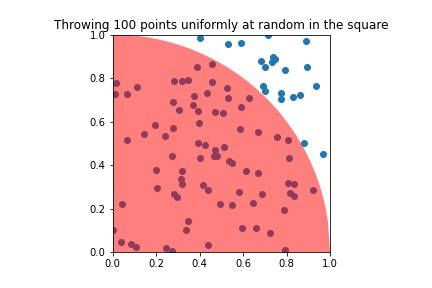
</div>

In this example, $S_{100}= \frac{4}{100} \cdot 79$ (there are $79$ points in the red region)
 
We now want a confidence interval on the value of $\pi$. For this, we note that
$$\mathbb{E}[S_{n}]=\pi, \qquad \mathsf{Var}(S_{n})= \frac{16}{n^{2}} \sum_{i=1}^{n} \mathsf{Var}(X_{i})= \frac{16}{n} \cdot \frac{\pi}{4} \cdot \left( 1- \frac{\pi}{4} \right) \leq  \frac{4}{n}$$
because $x(1-x) \leq 1/4$ on $[0,1]$.


According to the Bienaymé-Chebyshev inequality, we therefore have
\begin{equation}
\label{eq:BT-en} \mathbb{P}(|S_{n}-\pi | \geq \alpha) \leq  \frac{4}{\alpha^{2} n}.
\end{equation}

**Question 7** Simulate a confidence interval of $\pi$ with an amplitude at most $10^{-2}$ to $99\%$ by completing the following Code.

In [8]:
import numpy as np
import numpy.random as npr
import scipy.stats as sps
import matplotlib.pyplot as plt

n=3200000

X=npr.rand(n)
Y=npr.rand(n)

Sn=4/n*np.sum(X**2+Y**2<1) #sum counts the number of non-zero (or true) elements in an array

print ("Confidence interval for Pi at level 0.99: ["+str(Sn-0.01/2)+", "+str(Sn+0.01/2)+"]") #str is used to convert an integer to a string, and + is used to concatenate strings.
print ("The true value of Pi is "+str(np.pi))

Confidence interval for Pi at level 0.99: [3.1372237500000004, 3.14722375]
The true value of Pi is 3.141592653589793


## 4) Shooting at OK Corall

Let $n \geq 1$ be an integer. Two groups of bandits, each made up of $n$ people, meet at OK Corral for a settling of scores. As long as there is at least one bandit alive in each group, every second a bandit (chosen uniformly at random from those still alive, regardless of anything that happened before) kills a bandit from the other group. We note $V(n)$ as the (random) number of survivors following the shooting.

A theoretical study makes it possible to show that $ V(n)/n^{3/4}$ converges in law when $n \rightarrow \infty$ towards a real random density variable whose density is
$$ \sqrt{\frac{3}{\pi}} \cdot x \cdot e^{ - \frac{3 x^{4}}{16}} {1}_{x \geq 0}.$$

**Question 8.** Illustrate this convergence in law using simulations.

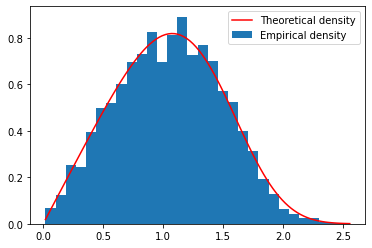

In [12]:
import numpy as np
import numpy.random as npr
import scipy.stats as sps
import matplotlib.pyplot as plt

def OKcorall(n): #OKcorall(n) returns a realization of V(n)
    a,b=n,n
    while a>0 and b>0:
        if npr.binomial(1,1.0*b/(a+b)):
            a-=1
        else:
            b-=1
    return a+b  
    
    
n=500 
N=5000 #Number of samples made with n fixed to estimate the law of V(n)/n^(3/4)


X=[OKcorall(n)/n**(3/4) for i in range(N)] 
plt.close()
plt.figure()
plt.hist(X, density=True, label="Empirical density", bins=30) #We look if the emperical density converges
x = np.linspace(min(X), max(X), 100)
f_x = np.sqrt(3/np.pi)*np.exp(-3*(x**4)/16)*x
plt.plot(x, f_x, "r", label="Theoretical density")
plt.legend()
plt.show()

## 5) Bonus

Here is the code used to generate the Figure in **3)**

There are 78 points in the red region


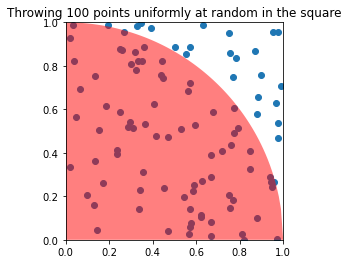

In [19]:
from math import *
from pylab import *
import numpy.random as npr
import scipy.stats as sps

n=100

X=npr.rand(n)
Y=npr.rand(n)

x=linspace(0,1,100)
y=sqrt(1-x**2)
x=insert(x,0,0) #insert 0 in 1st position
y=insert(y,0,0) #insert 0 at 1st position (so that red region passes through point (0,0))

scatter(X,Y) #draw points
fill(x,y, 'r',alpha=0.5) #Draw red region
axis([0,1,0,1]) #Restrict axes
title('Throwing '+str(n)+' points uniformly at random in the square') #Uses str to convert integer to string and + to concatenate strings
gca().set_aspect('equal', adjustable='box') #Forces axes to be of equal length

print('There are '+str(np.sum(X**2+Y**2<1))+' points in the red region')
savefig('fig.jpg') #Save figure 